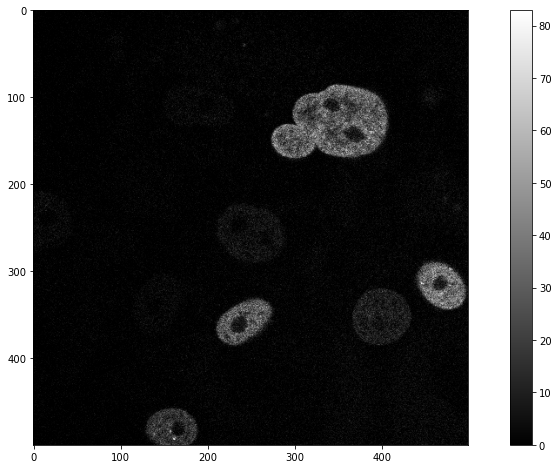

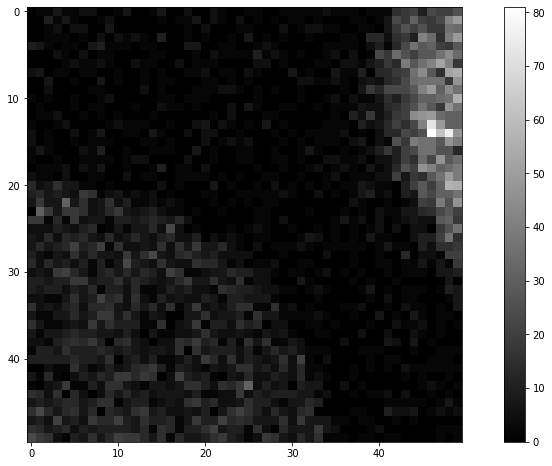

In [10]:
from Functions import image_processing as ip
import skimage.io as sk
import numpy as np
from Functions import unseeded_region_growing as urg


image = sk.imread("Data/N2DH-GOWT1/img/t01.tif")
img_r = ip.img_resize(image, 500, 500)
ip.show_image(img_r, 15, 8)

img_small = image[300:350, 400:450]
ip.show_image(img_small, 15, 8)

 # Startpixel is region number 1

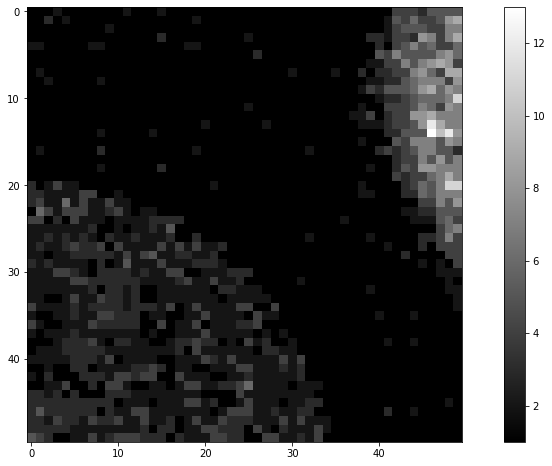

In [11]:
regions = np.zeros(img_small.shape, int)  # array with region number
regions[0, 0] = 1

#  Je kleiner Threshold, desto mehr Regionen und desto länger dauert es
regions_test = regions.copy()
test2 = urg.unseeded_region_growing_algorithm(img_small, regions_test, 5)
ip.show_image(test2, 15, 8)

141


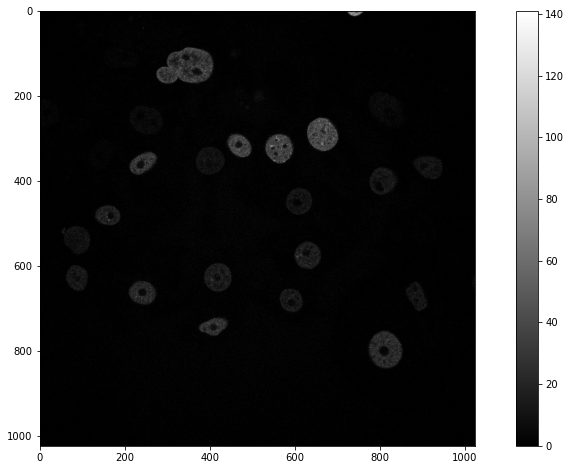

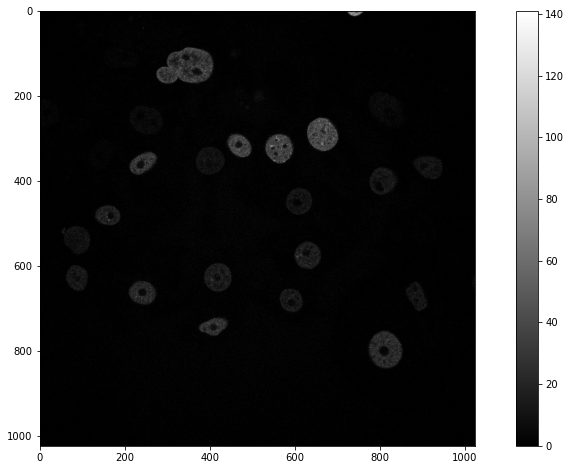

In [12]:
ip.show_image(image, 15, 8)

def image_clipping_reverse(img, t1, t2):
    #img_copy = img.copy()
    for p in np.ndindex(img.shape):
        img[p] = 5
        #if img[p] < t1:
        #    img_copy[p] = 0
        #if img[p] > t2:
        #    img_copy[p] = max(img.flatten())
        return img

image_clip_reverse = image_clipping_reverse(image, 5, 20)
ip.show_image(image_clip_reverse, 15, 8)
print(max(image.flatten()))
